In [1]:
#import dependencies

import pandas as pd
import numpy as np

from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
#read the file
file_to_load = "Resources/sephora_website_dataset.csv"
df=pd.read_csv(file_to_load)
df

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,2.0,15,6200,6.0,6.0,...,True,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0
9164,2298909,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,3 x 0.32 oz/ 9 g,0.0,0,266,15.0,27.0,...,True,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0
9165,2236750,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,0.946 oz/ 28 mL,0.0,0,445,16.0,16.0,...,True,exclusive,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,0,1,0,0
9166,50,SEPHORA COLLECTION,no category,Gift Card,no size,5.0,46,0,50.0,50.0,...,False,0,no options,What it is:- Available in denominations of $10...,no instructions,unknown,0,0,0,0


In [3]:
#view the central tendencies of all the columns
df.describe()

,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
count,9.168000e+03,9168.000000,9168.000000,9.168000e+03,9168.000000,9168.00000,9168.000000,9168.000000,9168.000000,9168.000000
mean,1.962952e+06,3.990020,282.139180,1.627859e+04,50.063237,51.82359,0.234839,0.264725,0.091841,0.000327
std,3.859714e+05,1.007707,890.642028,4.260651e+04,47.164989,49.45902,0.423921,0.441211,0.288817,0.018087
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000
25%,1.819453e+06,4.000000,10.000000,1.600000e+03,24.000000,25.00000,0.000000,0.000000,0.000000,0.000000
50%,2.072354e+06,4.000000,46.000000,4.800000e+03,35.000000,35.00000,0.000000,0.000000,0.000000,0.000000
75%,2.230591e+06,4.500000,210.000000,1.380000e+04,59.000000,60.00000,0.000000,1.000000,0.000000,0.000000
max,2.359685e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.00000,1.000000,1.000000,1.000000,1.000000


In [4]:
#examine the data types
df.dtypes

id                          int64
brand                      object
category                   object
name                       object
size                       object
rating                    float64
number_of_reviews           int64
love                        int64
price                     float64
value_price               float64
URL                        object
MarketingFlags               bool
MarketingFlags_content     object
options                    object
details                    object
how_to_use                 object
ingredients                object
online_only                 int64
exclusive                   int64
limited_edition             int64
limited_time_offer          int64
dtype: object

In [5]:
#examine the columns
df.columns

Index(['id', 'brand', 'category', 'name', 'size', 'rating',
       'number_of_reviews', 'love', 'price', 'value_price', 'URL',
       'MarketingFlags', 'MarketingFlags_content', 'options', 'details',
       'how_to_use', 'ingredients', 'online_only', 'exclusive',
       'limited_edition', 'limited_time_offer'],
      dtype='object')

In [6]:
#test for granularity/primary key
df["URL"].nunique()

9168

In [7]:
#any nans?
df.isna().sum().sum()

0

In [8]:
#any duplicates?
duplicates=df[df.duplicated()]
duplicates

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer


In [9]:
#find duplicate ids
#search for double company id entries
df["id"].nunique()
df["id"].value_counts()

1973841    2
1164805    2
2087047    2
2118982    2
1901859    2
          ..
2016707    1
2340156    1
1758465    1
2321719    1
2152445    1
Name: id, Length: 9115, dtype: int64

In [10]:
#investigate duplicate id numbers
duplicate_ids=df[df["id"].duplicated()]
duplicate_ids

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
42,2317907,AERIN,Perfume,Wild Geranium Travel Spray,0.27 oz/ 8 mL,5.0,2,697,30.0,30.0,...,True,online only,- 0.27 oz/ 8 mL Eau de Parfum Spray,Fragrance Family: FloralsScent Type: Fresh Flo...,Suggested Usage:-Fragrance is intensified by t...,Alcohol Denat.- Fragrance (Parfum)- Water\Aqua...,1,0,0,0
550,1164805,bareMinerals,Bronzer,Faux Tan Bronzer,0.05 oz/ 1.5 g,4.5,192,947,22.0,22.0,...,False,0,no options,What it is:\nA bronzing All Over Face Color.\n...,Suggested Usage:\n-Swirl a small amount of Fau...,Mica (CI 77019)- Bismuth Oxychloride (CI 77163...,0,0,0,0
656,1901859,BECCA,Face Primer,First Light Priming Filter Face Primer,1 oz/ 30 mL,4.5,1000,64500,39.0,39.0,...,False,0,no options,What it is: An instantly brightening makeup pr...,Suggested Usage:-Apply one to two pumps onto c...,-Cool Light Technology: Instantly brightens a...,0,0,0,0
1199,2086254,By Rosie Jane,Rollerballs & Travel Size,Angie Travel Spray,0.25 oz/ 7.5 mL,4.5,5,724,25.0,25.0,...,False,0,- 0.25 oz/ 7.5 mL Eau de Parfum Travel Spray,Fragrance Family: FloralScent Type: Classic Fl...,no instructions,Organic Cane Sugar Alcohol And Distilled Water...,0,0,0,0
1219,1858133,Calvin Klein,Rollerballs & Travel Size,Deep Euphoria Rollerball,0.33 oz/ 10 mL,3.5,5,1300,26.0,26.0,...,True,online only,no options,Deep Euphoria blurs the lines between fantasy ...,no instructions,Alcohol Denat.- Fragrance- Water- Benzophenone...,1,0,0,0
1266,455774,Caudalie,Makeup,Beauty Elixir Mini,no size,4.5,3000,57400,18.0,18.0,...,False,0,no options,Which skin type is it good for?\n✔ Normal\n✔ O...,Suggested Usage:\n-Spray on as toner before ap...,-Mint and Balm Mint Essential Oil: Provide as...,0,0,0,0
1383,2245199,Charlotte Tilbury,Lip Gloss,Lip Lustre Lip Gloss - Pillow Talk Collection,0.11 Fl. Oz/ 3.5 mL,3.5,68,5400,22.0,22.0,...,True,exclusive,no options,What it is: A lasting lip lacquer in Charlotte...,Suggested Usage:-For the day- cheat your lip s...,Polybutene- Isocetyl Stearate- Trimethylolprop...,0,1,0,0
1596,1426170,Clarisonic Skincare,Facial Cleansing Brushes,Deep Pore Facial Cleansing Brush Head Twin Pack,2 refills,5.0,2,0,44.0,54.0,...,False,0,no options,What it is:A duo of brush heads that visibly r...,Suggested Usage:-Remove eye makeup by hand.\n-...,unknown,0,0,0,0
1598,1340694,Clarisonic Skincare,Facial Cleansing Brushes,Deep Pore Facial Cleansing Brush Head,1 refill,4.5,4,0,27.0,27.0,...,False,0,no options,What it is:A brush head that visibly reduces t...,Suggested Usage:-Remove eye makeup by hand.\n-...,unknown,0,0,0,0
1650,1751544,CLEAN RESERVE,Rollerballs & Travel Size,Classic - Cashmere Rollerball,0.34 oz/ 10 mL,4.5,16,2400,24.0,24.0,...,False,0,no options,CLEAN Cashmere opens with sparkling bergamot- ...,no instructions,Alcohol Denat.- Fragrance- Water- Glycerin- Al...,0,0,0,0


In [11]:
#assess the reason for recurring ids == different scents/sizes for different products
df.loc[df["id"] == 1973841]

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
7044,1973841,SEPHORA COLLECTION,Eye Masks,Eye Mask,1 Pair,4.0,827,57300,5.0,5.0,...,True,exclusive,no options,To redeem your offer: \n1. SELECT FOUR MASKS: ...,Suggested Usage:\n-Remove the protective film ...,Water- Butylene Glycol- Glycerin- Aloe Barb...,0,1,0,0
9011,1973841,SEPHORA COLLECTION,Eye Masks,Eye Mask - Grape - Smoothing,1 Pair,3.5,3,0,5.0,5.0,...,True,exclusive,no options,To redeem your offer: \n1. SELECT FOUR MASKS: ...,Suggested Usage:-Remove the protective film fr...,Water- Butylene Glycol- Glycerin- Aloe Barb...,0,1,0,0


In [12]:
df.loc[df["id"] == 1858133]

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
1216,1858133,Calvin Klein,Perfume,Deep Euphoria,0.33 oz/ 10 mL,4.5,17,1500,26.0,26.0,...,True,online only,- 1.0 oz/ 30 mL Eau de Parfum Spray - 3.4 oz/...,Deep Euphoria blurs the lines between fantasy ...,no instructions,Alcohol Denat.- Fragrance- Water- Benzophenone...,1,0,0,0
1219,1858133,Calvin Klein,Rollerballs & Travel Size,Deep Euphoria Rollerball,0.33 oz/ 10 mL,3.5,5,1300,26.0,26.0,...,True,online only,no options,Deep Euphoria blurs the lines between fantasy ...,no instructions,Alcohol Denat.- Fragrance- Water- Benzophenone...,1,0,0,0


In [13]:
#evaluate quality of column data
print(df["brand"].unique())
df["brand"].nunique()

['Acqua Di Parma' 'AERIN' 'Aether Beauty' 'Algenist' 'Alpha-H'
 'alpyn beauty' 'ALTERNA Haircare' 'amika' 'AMOREPACIFIC'
 'Anastasia Beverly Hills' 'Anthony' 'Antonym' 'Aquis' 'Armani Beauty'
 'The Art of Shaving' 'Artis' 'Artist Couture' 'Atelier Cologne'
 'BALENCIAGA' 'bareMinerals' 'Beachwaver' 'The Beauty Chef' 'BeautyBio'
 'beautyblender' 'BECCA' 'belif' 'Benefit Cosmetics' 'BERDOUES'
 'Bésame Cosmetics' 'Better Not Younger' 'Bio Ionic' 'Biossance'
 'Bite Beauty' 'bkr' 'Black Up' 'Blinc' 'Bobbi Brown' 'boscia' 'Briogeo'
 'Bumble and bumble' 'BURBERRY' 'Buxom' 'BVLGARI' 'By Rosie Jane'
 'Calvin Klein' 'Capri Blue' 'Carolina Herrera' 'Caudalie' 'Cellu-cup'
 'CHANEL' 'Charlotte Tilbury' 'Chloé' 'Christian Louboutin'
 'Christophe Robin' 'Ciaté London' 'Cinema Secrets' 'Clarins'
 'Clarisonic Skincare' 'CLEAN RESERVE' 'CLINIQUE' 'Coal and Canary'
 'Cocofloss' 'Commodity' 'Comptoir Sud Pacifique' 'Conture' 'COOLA'
 'COVER FX' 'Crushed Tonic' 'dae' 'Deborah Lippmann' 'DEREK LAM 10 CROSBY'

324

In [14]:
#evaluate quality of column data
brand_counts=(df["brand"].value_counts())
print(brand_counts)
brand_counts.to_list()

SEPHORA COLLECTION     496
CLINIQUE               234
tarte                  170
TOM FORD               161
Dior                   145
                      ... 
SHHHOWERCAP              1
Too Cool For School      1
MDSolarSciences          1
Beachwaver               1
Cocofloss                1
Name: brand, Length: 324, dtype: int64


[496,
 234,
 170,
 161,
 145,
 138,
 126,
 120,
 104,
 99,
 98,
 96,
 95,
 93,
 85,
 84,
 81,
 81,
 76,
 76,
 76,
 75,
 74,
 74,
 73,
 71,
 70,
 70,
 69,
 67,
 67,
 66,
 64,
 64,
 64,
 60,
 60,
 60,
 59,
 59,
 58,
 58,
 57,
 57,
 57,
 55,
 54,
 54,
 54,
 54,
 54,
 52,
 52,
 51,
 51,
 50,
 50,
 49,
 48,
 48,
 46,
 45,
 45,
 44,
 43,
 43,
 42,
 42,
 42,
 40,
 38,
 38,
 38,
 37,
 36,
 36,
 36,
 36,
 35,
 35,
 35,
 35,
 35,
 34,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 32,
 32,
 31,
 31,
 31,
 30,
 30,
 30,
 29,
 29,
 29,
 28,
 28,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 27,
 27,
 27,
 26,
 26,
 26,
 26,
 26,
 25,
 25,
 25,
 25,
 25,
 25,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 

In [15]:
#evaluate quality of column data
print(df["category"].unique())
print(df["category"].nunique())
df["category"].value_counts()

['Fragrance' 'Cologne' 'Perfume' 'Body Mist & Hair Mist'
 'Body Lotions & Body Oils' 'Body Sprays & Deodorant' 'Perfume Gift Sets'
 'no category' 'Rollerballs & Travel Size' 'Lip Balm & Treatment'
 'Lotions & Oils' 'Eye Palettes' 'Highlighter' 'Cheek Palettes' 'Lipstick'
 'Face Serums' 'Moisturizers' 'Value & Gift Sets'
 'Eye Creams & Treatments' 'Face Sunscreen' 'Lip Balms & Treatments'
 'Mini Size' 'Face Masks' 'Face Wash & Cleansers'
 'Decollete & Neck Creams' 'Face Oils' 'Hand Cream & Foot Cream'
 'Face Primer' 'Color Correct' 'Mists & Essences' 'Tinted Moisturizer'
 'Concealer' 'Beauty Supplements' 'Facial Peels' 'Exfoliators'
 'Conditioner' 'Shampoo' 'Hair Styling Products' 'Scalp & Hair Treatments'
 'Hair Masks' 'Hair Spray' 'Hair Oil' 'Hair Primers' 'Dry Shampoo' 'Hair'
 'Hair Thinning & Hair Loss' 'Hair Straighteners & Flat Irons'
 'Hair Dryers' 'Color Care' 'Curling Irons' 'BB & CC Cream' 'Toners'
 'Sheet Masks' 'Skincare' 'Body Sunscreen' 'Eyebrow' 'Mascara'
 'Foundation' 'E

Perfume                  665
Moisturizers             451
Face Serums              384
Value & Gift Sets        378
Face Wash & Cleansers    247
                        ... 
Lid Shadow Brush           1
Cleansing Brushes          1
Lip Treatments             1
Spa Tools                  1
Powder Brush               1
Name: category, Length: 143, dtype: int64

In [16]:
#evaluate quality of column data
print(df["name"].unique())
print(df["name"].nunique())
df["name"].value_counts()

['Blu Mediterraneo MINIATURE Set' 'Colonia' 'Arancia di Capri' ...
 'Weekend Warrior Tone Up Cream' 'Gift Card' 'Happy Birthday Gift Card']
9106


Blush                                                                                4
Lipstick                                                                             3
The Foundation Brush                                                                 3
Face Mask                                                                            3
Pour Homme                                                                           3
                                                                                    ..
Ambient® Lighting Bronzer                                                            1
Balenciaga Paris                                                                     1
Advanced Génifique Yeux Light-Pearl™ Eye Illuminator Youth Activating Concentrate    1
SLEEP OIL Rejuvenating Miracle Tanning Oil                                           1
InvisiScar Resurfacing Treatment                                                     1
Name: name, Length: 9106, dtype: int64

In [17]:
# gift_cards1=df.loc[df["name"]=="Gift Card"]
# gift_cards2 = df.loc[df["name"]=="Happy Birthday Gift Card"]
# gift_cards = pd.DataFrame(gift_cards1,gift_cards2)


In [18]:
#evaluate quality of column data
print(df["size"].unique())
print(df["size"].nunique())
df["size"].value_counts()


['5 x 0.16oz/5mL' '0.7 oz/ 20 mL' '5 oz/ 148 mL' ... '0.53oz/15g'
 '3 x 0.32 oz/ 9 g' '0.946 oz/ 28 mL']
1623


no size                                                     3161
1.7 oz/ 50 mL                                                504
1 oz/ 30 mL                                                  377
3.4 oz/ 100 mL                                               188
0.5 oz/ 15 mL                                                176
                                                            ... 
4.7 oz/ 141 mL                                                 1
2 x 0.035 oz/ 0.99 g                                           1
0.49 oz/ 14 g                                                  1
Pencil: 0.001 oz/ 0.03g Liquid Liner: 0.0074 oz/ 0.22 mL       1
0.05 oz/ 1.7 mL                                                1
Name: size, Length: 1623, dtype: int64

In [19]:
#evaluate quality of column data
print(df["rating"].unique())
print(df["rating"].nunique())
df["rating"].value_counts()

[4.  4.5 3.5 5.  3.  0.  2.5 2.  1.  1.5]
10


4.5    3527
4.0    2853
3.5    1051
5.0     872
0.0     398
3.0     308
2.5      88
2.0      39
1.0      23
1.5       9
Name: rating, dtype: int64

In [20]:
df["rating"].describe()

count    9168.000000
mean        3.990020
std         1.007707
min         0.000000
25%         4.000000
50%         4.000000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

In [21]:
#create a column of good reviews (assumption = a good review = 4.0 or higher)
df["good_rating"]=df["rating"]>=4.0
df

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,good_rating
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0,True
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0,True
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0,True
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0,True
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,2.0,15,6200,6.0,6.0,...,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0,False
9164,2298909,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,3 x 0.32 oz/ 9 g,0.0,0,266,15.0,27.0,...,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0,False
9165,2236750,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,0.946 oz/ 28 mL,0.0,0,445,16.0,16.0,...,exclusive,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,0,1,0,0,False
9166,50,SEPHORA COLLECTION,no category,Gift Card,no size,5.0,46,0,50.0,50.0,...,0,no options,What it is:- Available in denominations of $10...,no instructions,unknown,0,0,0,0,True


In [22]:
zero_stars_df = df.loc[df["rating"]==0.0]
zero_stars_df

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,good_rating
14,2339661,Acqua Di Parma,Perfume,Camelia Eau de Parfum,3.4 oz/ 100 mL,0.0,0,143,275.0,275.0,...,online only,- 0.68 oz/ 20 mL Eau de Parfum Spray - 3.4 oz...,Fragrance Family: FloralsScent Type: Fresh Flo...,Suggested Usage:-Fragrance is intensified by t...,unknown,1,0,0,0,False
26,1775055,Acqua Di Parma,Cologne,Colonia Club,1.7 oz/ 50 mL,0.0,0,259,120.0,120.0,...,online only,- 1.7 oz/ 50 mL Eau de Cologne Spray,Colonia Club captures bold masculinity and a m...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0,False
31,2295202,Acqua Di Parma,Perfume Gift Sets,Blu Mediterraneo Arancia di Capri Gift Set,no size,0.0,0,204,113.0,143.0,...,limited edition · online only,no options,Fragrance Family: FreshScent Type: Fresh Citru...,Suggested Usage:-Fragrance is intensified by t...,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,1,0,False
32,2295186,Acqua Di Parma,Perfume Gift Sets,Rosa Nobile Gift Set,no size,0.0,0,235,200.0,279.0,...,limited edition · online only,no options,Fragrance Family: Floral\n\nScent Type: Classi...,Suggested Usage:-Fragrance is intensified by t...,unknown,1,0,1,0,False
33,2339703,Acqua Di Parma,Perfume,Sakura Eau de Parfum,3.4 oz/ 100 mL,0.0,0,165,275.0,275.0,...,online only,- 0.7 oz/ 20 mL Eau de Parfum Spray - 3.4 oz/...,Fragrance Family: FloralsScent Type: Fruity Fl...,Suggested Usage:-Fragrance is intensified by t...,Alcohol Denat.- Aqua (Water)- Parfum (Fragranc...,1,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9105,2290096,SEPHORA COLLECTION,Eye Brushes,PRO Shadow Brush #13,no size,0.0,0,400,20.0,20.0,...,exclusive,no options,What it is: A flat- slightly tapered-shape bru...,Suggested Usage:-Load brush head with product ...,unknown,0,1,0,0,False
9108,2232007,SEPHORA COLLECTION,Beauty Supplements,Sephora Collection x OLLY: Mini Glowing Skin,10 Count,0.0,0,692,7.0,7.0,...,exclusive,no options,Beauty Benefit: For Hydrated- Youthful Skin Wh...,Suggested Usage:-For best results- chew two gu...,-Hyaluronic Acid: Helps plump- smooth- and mo...,0,1,0,0,False
9164,2298909,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,3 x 0.32 oz/ 9 g,0.0,0,266,15.0,27.0,...,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0,False
9165,2236750,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,0.946 oz/ 28 mL,0.0,0,445,16.0,16.0,...,exclusive,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,0,1,0,0,False


In [23]:
helpful_stars_df = df.loc[df["rating"] >0.0]
helpful_stars_df.count()
helpful_stars_df

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,good_rating
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0,True
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0,True
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0,True
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0,True
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9160,2149847,SEPHORA COLLECTION,Bath Soaks & Bubble Bath,Fizzing Bath Star Mini - Surprise Flowers,0.53oz/15g,3.5,11,2100,2.0,2.0,...,exclusive · online only,no options,What it is: A fizzing star that dissolves int...,Suggested Usage:-Place the fizzing star in the...,Sodium Bicarbonate- Citric Acid- CI 77891 (Tit...,1,1,0,0,False
9161,1601111,SEPHORA COLLECTION,Brush Sets,Face the Day: Full Face Brush Set,no size,3.5,62,32900,49.0,95.0,...,limited edition · exclusive,no options,What it is:\nA six-piece brush set designed to...,no instructions,unknown,0,1,1,0,False
9162,2149839,SEPHORA COLLECTION,Scrub & Exfoliants,Exfoliating Body Granita Scrub - Surprise Flowers,8.45oz/250mL,3.5,39,6900,8.0,8.0,...,exclusive · online only,no options,What it is: An indulgent- yet gentle exfoliat...,Suggested Usage:-Apply to wet skin.-Massage in...,Water- Glycerin- Cellulose Acetate- Sodium Lau...,1,1,0,0,False
9163,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,2.0,15,6200,6.0,6.0,...,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0,False


In [24]:
#evaluate quality of column data
print(df["number_of_reviews"].nunique())

833


In [25]:
df["number_of_reviews"].describe()

count     9168.000000
mean       282.139180
std        890.642028
min          0.000000
25%         10.000000
50%         46.000000
75%        210.000000
max      19000.000000
Name: number_of_reviews, dtype: float64

In [26]:
#which product has the most reviews
df.loc[df["number_of_reviews"]==19000]

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,good_rating
519,1922541,bareMinerals,Foundation,Original Loose Powder Mineral Foundation Broad...,0.28 oz,4.5,19000,191700,32.0,32.0,...,0,no options,What it is: A buildable foundation- made with ...,Suggested Usage:\n-Use the Beautiful Finish Br...,-Titanium Dioxide and Zinc Oxide: Mineral sun...,0,0,0,0,True


In [27]:
#how many products have zero "loves"
df.groupby(df["number_of_reviews"] == 0)["URL"].count()


number_of_reviews
False    8771
True      397
Name: URL, dtype: int64

In [28]:
#how many products have zero reviews? What are they? How many loves do they have?
zero_reviews_df=df.loc[df["number_of_reviews"] == 0]
zero_reviews_df.describe()

,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
count,3.970000e+02,397.0,397.0,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.0
mean,2.249708e+06,0.0,0.0,576.727960,55.461713,62.668262,0.503778,0.267003,0.302267,0.0
std,2.635130e+05,0.0,0.0,1210.351659,52.951056,58.935080,0.500617,0.442952,0.459820,0.0
min,3.040000e+02,0.0,0.0,0.000000,5.300000,5.300000,0.000000,0.000000,0.000000,0.0
25%,2.266294e+06,0.0,0.0,138.000000,21.000000,24.000000,0.000000,0.000000,0.000000,0.0
50%,2.317691e+06,0.0,0.0,310.000000,38.000000,42.000000,1.000000,0.000000,0.000000,0.0
75%,2.338515e+06,0.0,0.0,613.000000,69.000000,80.000000,1.000000,1.000000,1.000000,0.0
max,2.359685e+06,0.0,0.0,17500.000000,324.000000,370.000000,1.000000,1.000000,1.000000,0.0


In [29]:
#how many items with 0 reviews are online only products?
zero_reviews_df.loc[df["online_only"]==1]

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,good_rating
14,2339661,Acqua Di Parma,Perfume,Camelia Eau de Parfum,3.4 oz/ 100 mL,0.0,0,143,275.0,275.0,...,online only,- 0.68 oz/ 20 mL Eau de Parfum Spray - 3.4 oz...,Fragrance Family: FloralsScent Type: Fresh Flo...,Suggested Usage:-Fragrance is intensified by t...,unknown,1,0,0,0,False
26,1775055,Acqua Di Parma,Cologne,Colonia Club,1.7 oz/ 50 mL,0.0,0,259,120.0,120.0,...,online only,- 1.7 oz/ 50 mL Eau de Cologne Spray,Colonia Club captures bold masculinity and a m...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0,False
31,2295202,Acqua Di Parma,Perfume Gift Sets,Blu Mediterraneo Arancia di Capri Gift Set,no size,0.0,0,204,113.0,143.0,...,limited edition · online only,no options,Fragrance Family: FreshScent Type: Fresh Citru...,Suggested Usage:-Fragrance is intensified by t...,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,1,0,False
32,2295186,Acqua Di Parma,Perfume Gift Sets,Rosa Nobile Gift Set,no size,0.0,0,235,200.0,279.0,...,limited edition · online only,no options,Fragrance Family: Floral\n\nScent Type: Classi...,Suggested Usage:-Fragrance is intensified by t...,unknown,1,0,1,0,False
33,2339703,Acqua Di Parma,Perfume,Sakura Eau de Parfum,3.4 oz/ 100 mL,0.0,0,165,275.0,275.0,...,online only,- 0.7 oz/ 20 mL Eau de Parfum Spray - 3.4 oz/...,Fragrance Family: FloralsScent Type: Fruity Fl...,Suggested Usage:-Fragrance is intensified by t...,Alcohol Denat.- Aqua (Water)- Parfum (Fragranc...,1,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8946,2320679,Yves Saint Laurent,Face Serums,Pure Shots Light Up Brightening Serum Refill,1 oz/ 30 mL,0.0,0,72,70.0,70.0,...,online only,no options,What it is: An environmentally-conscious refi...,Suggested Usage:-To release the refill from th...,-Vitamin Cg: Helps to reduce the look of yello...,1,0,0,0,False
8947,2320646,Yves Saint Laurent,Face Serums,Pure Shots Y Shape Firming Serum Refill,1 oz/ 30 mL,0.0,0,45,70.0,70.0,...,online only,no options,What it is: An environmentally-conscious refi...,Suggested Usage:-To release the refill from th...,-100-Percent Pure Firming Peptide: Helps visib...,1,0,0,0,False
8966,2321461,8Greens,Beauty Supplements,8Greens Skin Tablet,10 Tablet,0.0,0,488,16.0,16.0,...,online only,no options,Beauty Benefit: Hydrated and Healthy Skin- Na...,Suggested Usage:-Drop one tablet in eight ounc...,-Biotin: Converts food into energy and promot...,1,0,0,0,False
9042,2279982,SEPHORA COLLECTION,Facial Cleansing Brushes,Total Coverage Sponge: Cleansing Sponge,no size,0.0,0,529,14.0,14.0,...,exclusive · online only,no options,What it is: A facial-cleansing and exfoliating...,Suggested Usage:-Soak sponge in warm water. -F...,unknown,1,1,0,0,False


In [30]:
#What brands have zero reviews?
print(zero_reviews_df.groupby("brand")["brand"].count().sort_values(ascending=False))
zero_reviews_df

brand
SEPHORA COLLECTION    31
CLINIQUE              15
NEST New York         12
Virtue                11
Living Proof          10
                      ..
Kosas                  1
Kate Somerville        1
KVD Vegan Beauty       1
KEVYN AUCOIN           1
tarte                  1
Name: brand, Length: 132, dtype: int64


,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,good_rating
14,2339661,Acqua Di Parma,Perfume,Camelia Eau de Parfum,3.4 oz/ 100 mL,0.0,0,143,275.0,275.0,...,online only,- 0.68 oz/ 20 mL Eau de Parfum Spray - 3.4 oz...,Fragrance Family: FloralsScent Type: Fresh Flo...,Suggested Usage:-Fragrance is intensified by t...,unknown,1,0,0,0,False
26,1775055,Acqua Di Parma,Cologne,Colonia Club,1.7 oz/ 50 mL,0.0,0,259,120.0,120.0,...,online only,- 1.7 oz/ 50 mL Eau de Cologne Spray,Colonia Club captures bold masculinity and a m...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0,False
31,2295202,Acqua Di Parma,Perfume Gift Sets,Blu Mediterraneo Arancia di Capri Gift Set,no size,0.0,0,204,113.0,143.0,...,limited edition · online only,no options,Fragrance Family: FreshScent Type: Fresh Citru...,Suggested Usage:-Fragrance is intensified by t...,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,1,0,False
32,2295186,Acqua Di Parma,Perfume Gift Sets,Rosa Nobile Gift Set,no size,0.0,0,235,200.0,279.0,...,limited edition · online only,no options,Fragrance Family: Floral\n\nScent Type: Classi...,Suggested Usage:-Fragrance is intensified by t...,unknown,1,0,1,0,False
33,2339703,Acqua Di Parma,Perfume,Sakura Eau de Parfum,3.4 oz/ 100 mL,0.0,0,165,275.0,275.0,...,online only,- 0.7 oz/ 20 mL Eau de Parfum Spray - 3.4 oz/...,Fragrance Family: FloralsScent Type: Fruity Fl...,Suggested Usage:-Fragrance is intensified by t...,Alcohol Denat.- Aqua (Water)- Parfum (Fragranc...,1,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9105,2290096,SEPHORA COLLECTION,Eye Brushes,PRO Shadow Brush #13,no size,0.0,0,400,20.0,20.0,...,exclusive,no options,What it is: A flat- slightly tapered-shape bru...,Suggested Usage:-Load brush head with product ...,unknown,0,1,0,0,False
9108,2232007,SEPHORA COLLECTION,Beauty Supplements,Sephora Collection x OLLY: Mini Glowing Skin,10 Count,0.0,0,692,7.0,7.0,...,exclusive,no options,Beauty Benefit: For Hydrated- Youthful Skin Wh...,Suggested Usage:-For best results- chew two gu...,-Hyaluronic Acid: Helps plump- smooth- and mo...,0,1,0,0,False
9164,2298909,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,3 x 0.32 oz/ 9 g,0.0,0,266,15.0,27.0,...,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0,False
9165,2236750,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,0.946 oz/ 28 mL,0.0,0,445,16.0,16.0,...,exclusive,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,0,1,0,0,False


In [31]:
#Create a df with brands that have one or more reviews?
helpful_reviews_df=df.loc[df["number_of_reviews"] > 0]
helpful_reviews_df

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,good_rating
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0,True
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0,True
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0,True
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0,True
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9160,2149847,SEPHORA COLLECTION,Bath Soaks & Bubble Bath,Fizzing Bath Star Mini - Surprise Flowers,0.53oz/15g,3.5,11,2100,2.0,2.0,...,exclusive · online only,no options,What it is: A fizzing star that dissolves int...,Suggested Usage:-Place the fizzing star in the...,Sodium Bicarbonate- Citric Acid- CI 77891 (Tit...,1,1,0,0,False
9161,1601111,SEPHORA COLLECTION,Brush Sets,Face the Day: Full Face Brush Set,no size,3.5,62,32900,49.0,95.0,...,limited edition · exclusive,no options,What it is:\nA six-piece brush set designed to...,no instructions,unknown,0,1,1,0,False
9162,2149839,SEPHORA COLLECTION,Scrub & Exfoliants,Exfoliating Body Granita Scrub - Surprise Flowers,8.45oz/250mL,3.5,39,6900,8.0,8.0,...,exclusive · online only,no options,What it is: An indulgent- yet gentle exfoliat...,Suggested Usage:-Apply to wet skin.-Massage in...,Water- Glycerin- Cellulose Acetate- Sodium Lau...,1,1,0,0,False
9163,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,2.0,15,6200,6.0,6.0,...,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0,False


In [32]:
#Are the products with zero stars equal to the products with zero reviews? NO
helpful_stars_df.equals(helpful_reviews_df)

False

In [33]:
#investigate the love central tendencies for the helpful reviews (greater than 0 reviews) df
print("The measures of central tendency for helpful_reviews_df:")
print(helpful_reviews_df["love"].nunique())
print(helpful_reviews_df["love"].min())
print(helpful_reviews_df["love"].max())
print(helpful_reviews_df["love"].mean())
print(helpful_reviews_df["love"].median())
helpful_reviews_df["love"].value_counts(bins = 4)

The measures of central tendency for helpful_reviews_df:
1556
0
1300000
16989.295063276706
5200.0


(-1300.001, 325000.0]    8737
(325000.0, 650000.0]       30
(650000.0, 975000.0]        3
(975000.0, 1300000.0]       1
Name: love, dtype: int64

In [34]:
#investigate the same for the whole df
print(df["love"].nunique())
print(df["love"].min())
print(df["love"].max())
print(df["love"].mean())
print(df["love"].median())
df["love"].value_counts(bins = 4)

1683
0
1300000
16278.585078534032
4800.0


(-1300.001, 325000.0]    9134
(325000.0, 650000.0]       30
(650000.0, 975000.0]        3
(975000.0, 1300000.0]       1
Name: love, dtype: int64

In [35]:
#which product has the most "loves"
df.loc[df["love"] ==1300000]

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,good_rating
4602,1890623,KVD Vegan Beauty,Lipstick,Everlasting Liquid Lipstick,0.22 oz/ 6.6 mL,4.5,14000,1300000,21.0,21.0,...,exclusive,no options,What it is: A long-wear- high-pigment liquid l...,Suggested Usage:-For precise definition- line ...,Isododecane- Caprylic/Capric Triglyceride- Dis...,0,1,0,0,True


In [36]:
helpful_loves=df.loc[df["love"]<650000]
helpful_loves

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,good_rating
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0,True
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0,True
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0,True
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0,True
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,2.0,15,6200,6.0,6.0,...,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0,False
9164,2298909,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,3 x 0.32 oz/ 9 g,0.0,0,266,15.0,27.0,...,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0,False
9165,2236750,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,0.946 oz/ 28 mL,0.0,0,445,16.0,16.0,...,exclusive,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,0,1,0,0,False
9166,50,SEPHORA COLLECTION,no category,Gift Card,no size,5.0,46,0,50.0,50.0,...,0,no options,What it is:- Available in denominations of $10...,no instructions,unknown,0,0,0,0,True


In [37]:
most_loves_outliers=df.loc[df["love"]>650000]
most_loves_outliers

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,good_rating
272,1056084,Anastasia Beverly Hills,Eyebrow,Brow Wiz,0.003 oz/ 0.085 g,4.5,14000,660000,23.0,23.0,...,0,no options,What it is:\nAn ultra-slim- retractable pencil...,Suggested Usage:\nUse Brow Wiz to create a per...,\n-Vitamin E: Helps skin fight damage caus...,0,0,0,0,True
4602,1890623,KVD Vegan Beauty,Lipstick,Everlasting Liquid Lipstick,0.22 oz/ 6.6 mL,4.5,14000,1300000,21.0,21.0,...,exclusive,no options,What it is: A long-wear- high-pigment liquid l...,Suggested Usage:-For precise definition- line ...,Isododecane- Caprylic/Capric Triglyceride- Dis...,0,1,0,0,True
4952,870618,Laura Mercier,Setting Spray & Powder,Translucent Loose Setting Powder,1 oz/ 30 mL,4.5,8000,657100,39.0,39.0,...,0,no options,What it is: A lightweight- easy-to-apply- loos...,Suggested Usage:-Prep Laura Mercier’s Velour P...,Talc- Magnesium Myristate- Nylon-12- Caprylic/...,0,0,0,0,True
5837,2172310,NARS,Concealer,Radiant Creamy Concealer,0.22 oz/ 6 mL,4.5,11000,770700,30.0,30.0,...,0,no options,What it is: An award-winning concealer that c...,Suggested Usage:-Apply directly from the appli...,Water/Aqua/Eau- Dimethicone- Hydrogenated Poly...,0,0,0,0,True


In [38]:
#how many products have zero "loves" -- 181
df.groupby(df["love"] == 0)["id"].count()


love
False    8987
True      181
Name: id, dtype: int64

In [39]:
#Are there any trends in brands?
zero_love_df=df.loc[df["love"] == 0]
zero_love_df.groupby("brand")["brand"].count().sort_values(ascending=False)


brand
SEPHORA COLLECTION    38
Dr. Jart+             12
Fresh                  9
TOCCA                  8
Dior                   7
                      ..
LANEIGE                1
Living Proof           1
MAKE UP FOR EVER       1
Maison Margiela        1
Kérastase              1
Name: brand, Length: 71, dtype: int64

In [40]:
#proportion of brand offerings with zero love = There are no brands that had the majority of their offerings have zero loves
proportions=(zero_love_df.groupby("brand")["brand"].count().sort_values(ascending=False)/(df.groupby("brand")["brand"].count().sort_values(ascending=False))*100)
proportions=proportions.dropna().sort_values(ascending=False)
proportions

brand
Saint Jane Beauty      33.333333
Clarisonic Skincare    30.434783
Mount Lai              25.000000
Pink Sugar             25.000000
Dr. Jart+              22.222222
                         ...    
Kérastase               1.041667
MAKE UP FOR EVER        1.010101
Bumble and bumble       0.961538
CLINIQUE                0.854701
TOM FORD                0.621118
Name: brand, Length: 71, dtype: float64

In [41]:
#examine the price colum
print(df["price"].nunique())
df["price"].describe()


286


count    9168.000000
mean       50.063237
std        47.164989
min         2.000000
25%        24.000000
50%        35.000000
75%        59.000000
max       549.000000
Name: price, dtype: float64

In [42]:
#examine the difference between price and value price
print(df["value_price"].nunique())
df["value_price"].describe()

322


count    9168.00000
mean       51.82359
std        49.45902
min         2.00000
25%        25.00000
50%        35.00000
75%        60.00000
max       549.00000
Name: value_price, dtype: float64

In [43]:
#examine the options column
df["options"].nunique()
df["options"].value_counts()

no options                                                                                                       8377
 - 1.7 oz/ 50 mL Eau de Parfum Spray                                                                               16
 - 1.7 oz/ 50 mL Eau de Parfum Spray  - 3.4 oz/ 100 mL Eau de Parfum Spray                                         14
 - 1.0 oz/ 30 mL  Spray - 3.4 oz/ 100 mL  Spray                                                                    13
 - 0.33 oz/ 10 mL Eau de Parfum Spray                                                                              12
                                                                                                                 ... 
 - 3.4 oz/ 101 mL Eau de Toilette Spray                                                                             1
 - 1 oz/ 30 mL & 3 oz/ 90 mL Eau de Parfum Set                                                                      1
 - 1.0 oz/ 30 mL Eau de Parfum Spray - 1.7 oz/ 50 mL Eau

In [44]:
#examine the details column
print(df["details"].nunique())


8839


In [45]:
#examine the online only column 1 = True
print(df["online_only"].unique())
print(df["online_only"].nunique())
df["online_only"].value_counts()

[1 0]
2


0    7015
1    2153
Name: online_only, dtype: int64

In [46]:
#Examine the exclusive column 1 == exclusive to Sephora
print(df["exclusive"].unique())
print(df["exclusive"].nunique())
df["exclusive"].value_counts()

[0 1]
2


0    6741
1    2427
Name: exclusive, dtype: int64

In [47]:
#see how many products are limited edition
print(df["limited_edition"].unique())
print(df["limited_edition"].nunique())
df["limited_edition"].value_counts()

[0 1]
2


0    8326
1     842
Name: limited_edition, dtype: int64

In [48]:
#Which columns offer a mix of exclusivity/limited or online only distribution
df["MarketingFlags"].value_counts()

False    4786
True     4382
Name: MarketingFlags, dtype: int64

In [49]:
#examine the mfcontent column and frequencies
print(df["MarketingFlags_content"].unique())
print(df["MarketingFlags_content"].nunique())
df["MarketingFlags_content"].value_counts()

['online only' 'exclusive · online only' '0'
 'limited edition · exclusive · online only'
 'limited edition · online only' 'exclusive' 'limited edition · exclusive'
 'limited edition' 'limited time offer'
 'limited time offer · limited edition · exclusive']
10


0                                                   4786
exclusive                                           1692
online only                                         1528
exclusive · online only                              318
limited edition · exclusive                          297
limited edition                                      237
limited edition · online only                        188
limited edition · exclusive · online only            119
limited time offer                                     2
limited time offer · limited edition · exclusive       1
Name: MarketingFlags_content, dtype: int64

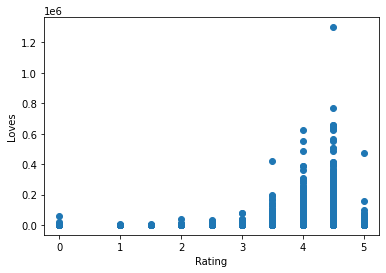

In [50]:
#visualize the relationship between ratings and loves
plt.scatter(df.rating, df.love)
plt.xlabel('Rating')
plt.ylabel('Loves')
plt.show()

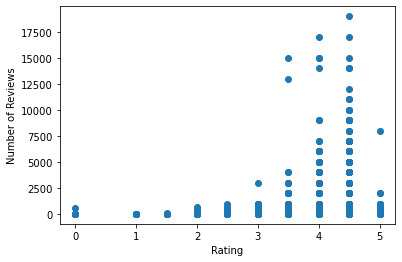

In [51]:
#visualize the relationship between ratings and number of reviews
plt.scatter(df.rating, df.number_of_reviews)
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

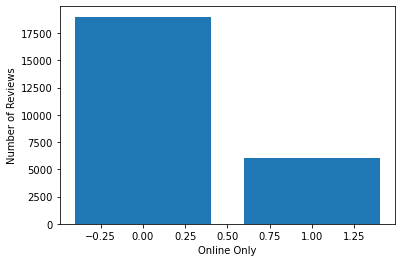

In [52]:
plt.bar(df.online_only, df.number_of_reviews)
plt.xlabel('Online Only')
plt.ylabel('Number of Reviews')
plt.show()

In [54]:
df.to_csv("Resources/beauty_habits_clean.csv")
helpful_reviews_df.to_csv("Resources/helpful_review_count.csv")
zero_reviews_df.to_csv("Resources/zero_reviews.csv")
